In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [2]:
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [3]:
model = model_fn()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [5]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

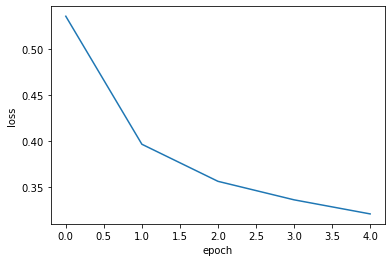

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

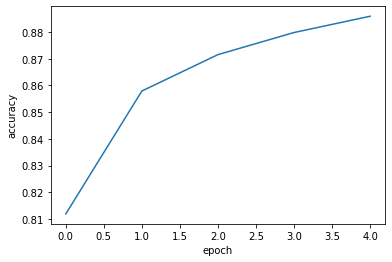

In [7]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

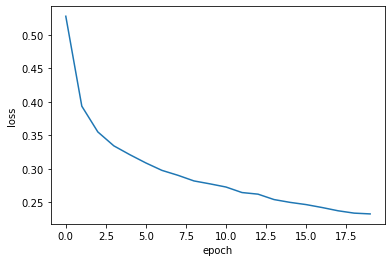

In [8]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [9]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

In [10]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

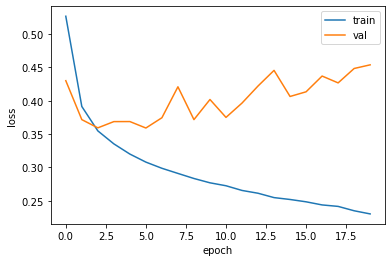

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

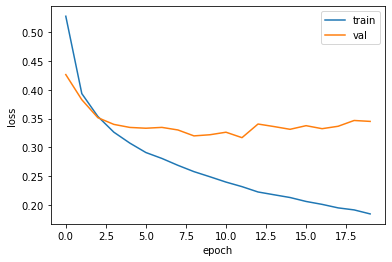

In [12]:
# 옵티마이저 적용
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [13]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


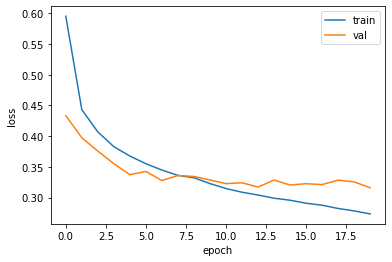

In [14]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [15]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=10, verbose=0, validation_data=(val_scaled, val_target))

In [16]:
model.save_weights('model-weights.h5')

In [17]:
model.save('model-whole.h5')

In [18]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

In [19]:
import numpy as np

val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels== val_target))

0.8828333333333334


In [23]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])

Epoch 1/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5942 - accuracy: 0.7927 - val_loss: 0.4188 - val_accuracy: 0.8494
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4428 - accuracy: 0.8414 - val_loss: 0.3870 - val_accuracy: 0.8585
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4033 - accuracy: 0.8521 - val_loss: 0.3721 - val_accuracy: 0.8687
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3818 - accuracy: 0.8591 - val_loss: 0.3691 - val_accuracy: 0.8616
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3667 - accuracy: 0.8654 - val_loss: 0.3470 - val_accuracy: 0.8726
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3569 - accuracy: 0.8705 - val_loss: 0.3324 - val_accuracy: 0.8817
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3447 - accuracy: 0.8733 - val_loss: 0.3455 - val_accuracy:

In [24]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3191 - accuracy: 0.8848


[0.3191443979740143, 0.8847500085830688]

In [25]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5852 - accuracy: 0.7935 - val_loss: 0.4301 - val_accuracy: 0.8419
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4392 - accuracy: 0.8419 - val_loss: 0.3882 - val_accuracy: 0.8547
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4017 - accuracy: 0.8545 - val_loss: 0.3672 - val_accuracy: 0.8677
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3780 - accuracy: 0.8626 - val_loss: 0.3451 - val_accuracy: 0.8728
Epoch 5/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3627 - accuracy: 0.8691 - val_loss: 0.3487 - val_accuracy: 0.8694
Epoch 6/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3481 - accuracy: 0.8720 - val_loss: 0.3418 - val_accuracy: 0.8745
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3435 - accuracy: 0.8711 - val_loss: 0.3364 - val_accuracy:

In [26]:
early_stopping_cb.stopped_epoch

9

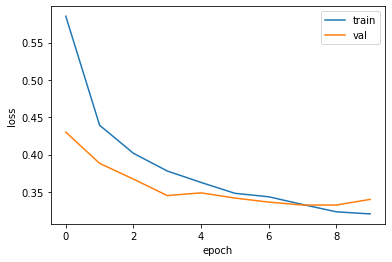

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [28]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3324 - accuracy: 0.8789


[0.33242717385292053, 0.8789166808128357]